# VISUALIZATION

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

attacks_cleaned = pd.read_csv(r"C:\Users\photo\Desktop\Ironhack\projects\project1-shark_attacks\data\attacks_cleaned.csv", encoding='latin1')

attacks_cleaned

,case number,date,year,type,country,area,location,activity,name,sex,...,injury,fatal (y/n),time,species,case number.1,case number.2,country_clean,activity_clean,time_clean,date_clean
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",paddling,Julie Wolfe,F,...,"No injury to occupant, outrigger canoe and pad...",N,18h00,white,2018.06.25,2018.06.25,NaN,kayaking,18:00,Jun
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",standing,AdysonÂ McNeely,F,...,Minor injury to left thigh,N,14h00 -15h00,other,2018.06.18,2018.06.18,NaN,NaN,14:00,Jun
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",surfing,John Denges,M,...,Injury to left lower leg from surfboard skeg,N,07h45,other,2018.06.09,2018.06.09,NaN,surfing,07:45,Jun
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,surfing,male,M,...,Minor injury to lower leg,N,NaN,other,2018.06.08,2018.06.08,AUSTRALIA,surfing,NaN,Jun
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,free diving,Gustavo Ramos,M,...,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,tiger,2018.06.04,2018.06.04,MEXICO,diving,NaN,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN


## NUMBER OF ATTACKS BY YEAR & SEX

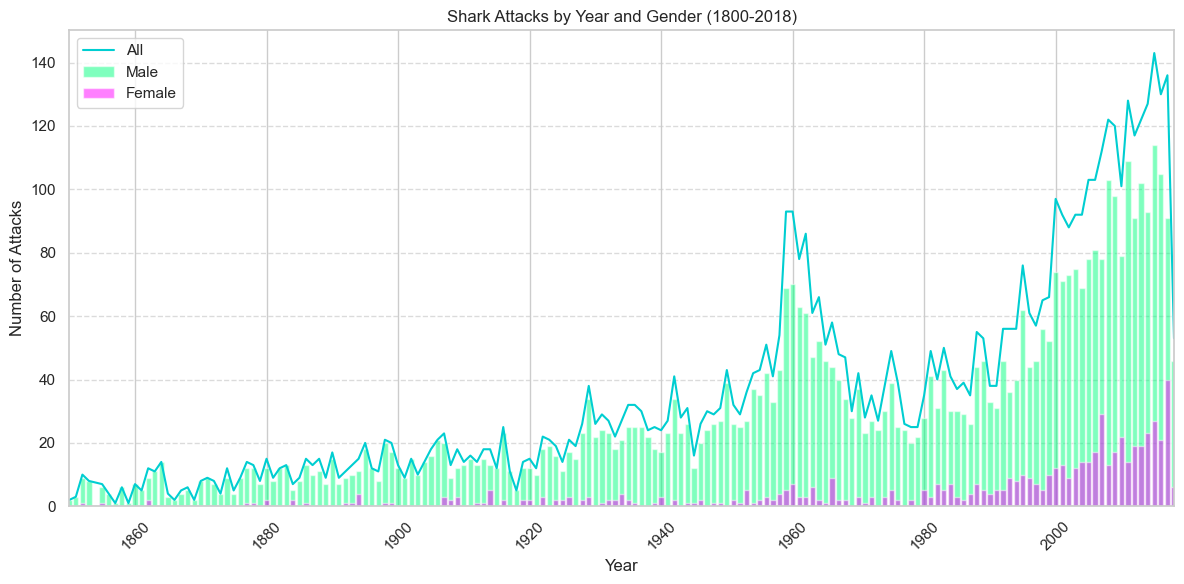

In [47]:
attacks_cleaned = attacks_cleaned[(attacks_cleaned['year'] >= 1850) & (attacks_cleaned['year'] <= 2018)]

attacks_per_year = attacks_cleaned['year'].value_counts().sort_index()

attacks_by_gender = attacks_cleaned.groupby(['year', 'sex']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))

plt.bar(attacks_by_gender.index, attacks_by_gender['M'], color='springgreen', alpha=0.5, label='Male')

plt.bar(attacks_by_gender.index, attacks_by_gender['F'], color='magenta', alpha=0.5, label='Female')

plt.title('Shark Attacks by Year and Gender (1800-2018)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.plot(attacks_per_year.index, attacks_per_year.values, color='darkturquoise', label='All', linestyle='-')

plt.legend()

plt.xlim(1850, 2018)

plt.tight_layout()

plt.savefig(r'C:\Users\photo\Desktop\Ironhack\projects\project1-shark_attacks\images/number_of_attacks_yearandsex.png')
plt.show()

## SPECIES AND ACTIVITIES THAT LIKE THE MOST TO BITE AND PREFERRED ACTIVITY!

<Figure size 1200x800 with 0 Axes>

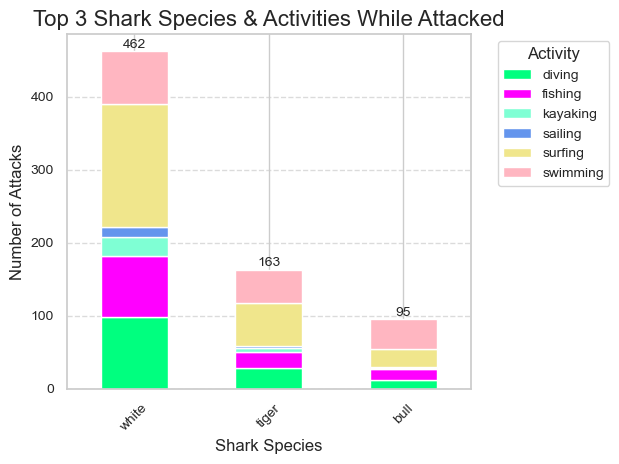

In [48]:
species_to_exclude = ['other', 'silvertip', 'shovelnose', 'porbeagle', 'galapagos', 'broadnose', 'whitetip', 'spinner', 'hammerhead', 'nurse', 'grey reef', 'lemon', 'wobbegong', 'blue', 'mako', 'bronze', 'blacktip']
activity_to_exclude = 'shark interacting'

attacks_cleaned = attacks_cleaned[~attacks_cleaned['species'].isin(species_to_exclude)]
attacks_cleaned = attacks_cleaned[attacks_cleaned['activity_clean'] != activity_to_exclude]

attacks_grouped = attacks_cleaned.groupby(['species', 'activity_clean']).size().unstack().fillna(0)

species_totals = attacks_grouped.sum(axis=1)
species_totals = species_totals.sort_values(ascending=False)
attacks_grouped = attacks_grouped.loc[species_totals.index]

colors = ["springgreen", "magenta", "aquamarine", "cornflowerblue", "khaki", "lightpink", "#FFDEA0", "#C0C1E1", "#FFE6A1", "#F4E1B2"]

plt.figure(figsize=(12, 8))  

ax = attacks_grouped.plot(kind='bar', stacked=True, color=colors)

plt.title('Top 3 Shark Species & Activities While Attacked', fontsize=16)
plt.xlabel('Shark Species', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)

plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

for i in range(len(attacks_grouped.index)):
    total_count = attacks_grouped.iloc[i].sum()
    plt.text(i, total_count + 5, str(total_count), ha='center', fontsize=10)

plt.tight_layout()

sns.set(style="whitegrid")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig(r'C:\Users\photo\Desktop\Ironhack\projects\project1-shark_attacks\images/top-3_shark_species_attacks.png')

plt.show()

## COUNTRIES WITH MORE SHARK ATTACKS!

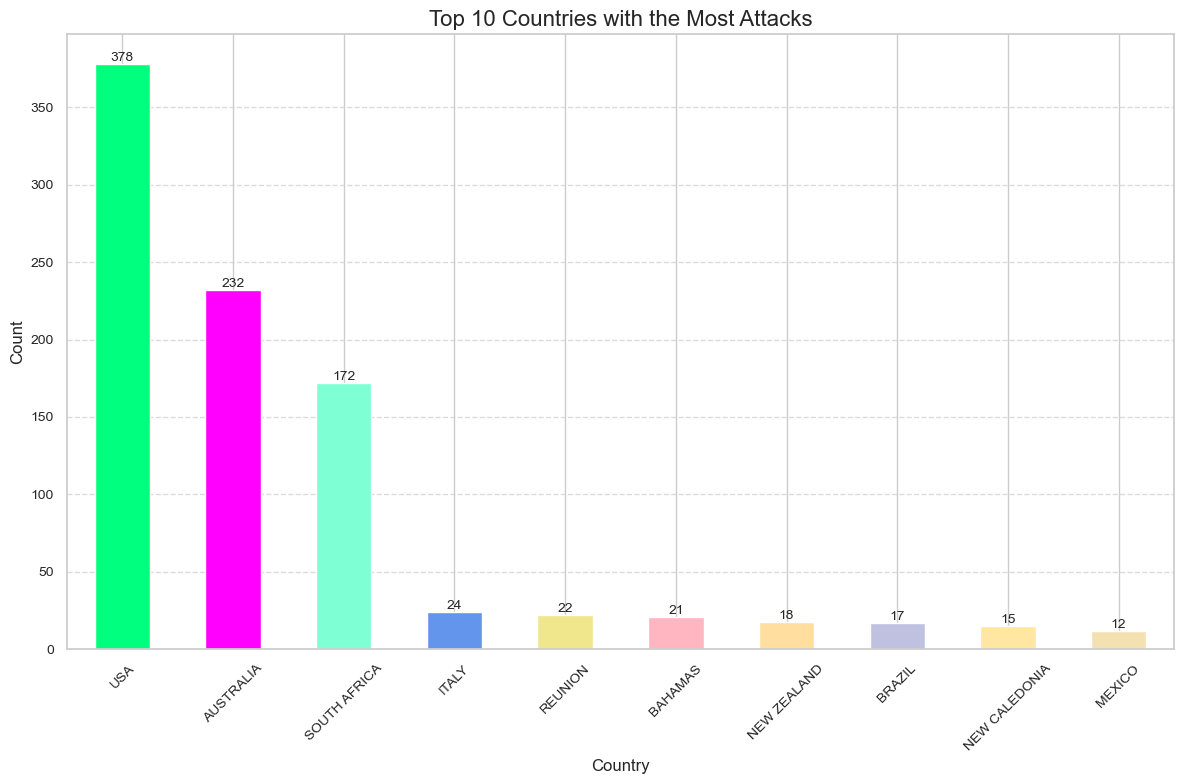

In [49]:
country_counts = attacks_cleaned['country'].value_counts()

top_n = 10
top_countries = country_counts.head(top_n)

plt.figure(figsize=(12, 8))

top_countries.plot(kind='bar', color=colors)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title(f'Top {top_n} Countries with the Most Attacks', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(top_countries):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig(r'C:\Users\photo\Desktop\Ironhack\projects\project1-shark_attacks\images/top-10_countries with most attacks.png')
plt.show()

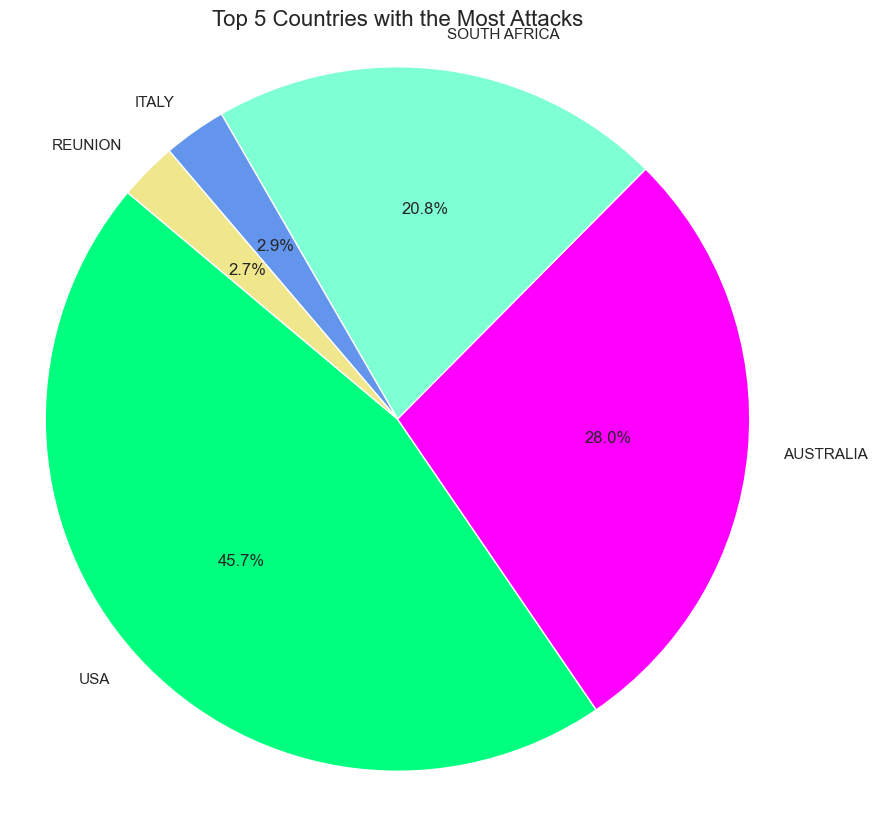

In [50]:
country_counts = attacks_cleaned['country'].value_counts()

top_n = 5  
top_countries = country_counts.head(top_n)

plt.figure(figsize=(10, 10))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title(f'Top {top_n} Countries with the Most Attacks', fontsize=16)

plt.axis('equal') 

plt.savefig(r'C:\Users\photo\Desktop\Ironhack\projects\project1-shark_attacks\images/top-5_countries_attacks.png')
plt.show()